In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

In [ ]:
%run ../test/test_predictorsIII.py

In [ ]:
%run ../test/test_activate.py

In [ ]:
%run ../test/test_evaluation.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2010-02-01', '2010-02-11')

In [ ]:
test.get_data()

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.3

In [ ]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
# adjusted close

In [ ]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
predict = DataLoader('BP', '2018-05-02', '2018-08-01')
predict = predict.calculate_returns_adj()

In [ ]:
predict = predict[1:]

In [ ]:
training = DataLoader('BP', '2015-01-01', '2018-01-01') # loading training DataFrame to train model on
training = training.calculate_returns_adj()

In [ ]:
training = training[1:]

In [ ]:
predict_req, real = data_prep(predict, 30, 5) # dividing data into predictor input and real data

In [ ]:
individual_predictors_forecasts = individual_predictors_template0(training, predict_req, 5, 10) # make forecast

In [ ]:
consensus_forecasts = consensus(individual_predictors_forecasts, real) # create consolidation values

In [ ]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [ ]:
all_forecasts

In [ ]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real) # create absolute error DataFrame

In [ ]:
prediction_error

In [ ]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
plot_performance(all_forecasts)

In [15]:
%run ../system/activate.py

In [16]:
%run ../experimental/predictorsX.py

In [17]:
train = DataLoader('BP', '2010-01-01', '2018-08-01')
train = train.get_data()

[*********************100%***********************]  1 of 1 completed


In [18]:
predict = DataLoader('BP', '2018-02-01', '2018-05-01')
predict = predict.get_data()

[*********************100%***********************]  1 of 1 completed


In [19]:
test = BasicMultivariatePredictor(20, 10, train)

In [20]:
test.create_lstm()

In [21]:
test.fit_model(10)

Epoch 1/10
171/171 [==============================] - 3s 20ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/10
171/171 [==============================] - 3s 16ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/10
171/171 [==============================] - 3s 17ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/10
171/171 [==============================] - 3s 15ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/10
171/171 [==============================] - 3s 15ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/10
171/171 [==============================] - 3s 16ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/10
171/171 [==============================] - 3s 18ms/step - loss: nan - mean_squared_

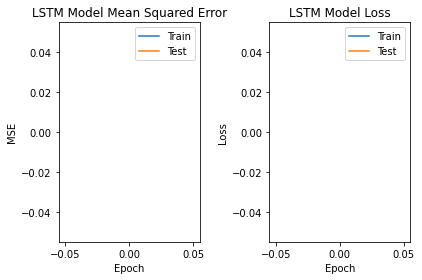

In [22]:
test.show_performance()

In [23]:
predict

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-01,42.799999,43.380001,42.720001,43.360001,34.823174,6508800
2018-02-02,42.599998,42.610001,41.090000,41.160000,33.056301,9559700
2018-02-05,40.779999,40.869999,36.150002,39.779999,31.947998,16464900
2018-02-06,39.540001,40.840000,39.419998,40.570000,32.582458,10875200
2018-02-07,40.540001,41.009998,39.919998,40.000000,32.124687,8591300
...,...,...,...,...,...,...
2018-04-25,43.840000,44.230000,43.450001,44.169998,36.008873,6782600
2018-04-26,44.750000,44.889999,44.650002,44.849998,36.563232,6753000
2018-04-27,44.299999,44.490002,44.060001,44.220001,36.049637,4454500


In [24]:
predict2 = predict[['Open', 'High', 'Low', 'Adj Close']]
predict2

,Open,High,Low,Adj Close
Date,,,,
2018-02-01,42.799999,43.380001,42.720001,34.823174
2018-02-02,42.599998,42.610001,41.090000,33.056301
2018-02-05,40.779999,40.869999,36.150002,31.947998
2018-02-06,39.540001,40.840000,39.419998,32.582458
2018-02-07,40.540001,41.009998,39.919998,32.124687
...,...,...,...,...
2018-04-25,43.840000,44.230000,43.450001,36.008873
2018-04-26,44.750000,44.889999,44.650002,36.563232
2018-04-27,44.299999,44.490002,44.060001,36.049637


In [25]:
predict3 = pred_input(predict2, 20, 'Adj Close')

In [26]:
predict3

array([[42.79999924, 43.38000107, 42.72000122],
       [42.59999847, 42.61000061, 41.09000015],
       [40.77999878, 40.86999893, 36.15000153],
       [39.54000092, 40.84000015, 39.41999817],
       [40.54000092, 41.00999832, 39.91999817],
       [40.54000092, 40.68000031, 39.54000092],
       [39.25999832, 39.5       , 37.90000153],
       [39.61000061, 39.99000168, 39.52999878],
       [39.70999908, 39.88999939, 39.59000015],
       [39.38000107, 40.43000031, 39.27999878],
       [40.08000183, 40.09999847, 39.33000183],
       [39.61000061, 40.02000046, 39.50999832],
       [39.95000076, 40.08000183, 39.43999863],
       [39.56999969, 39.72999954, 38.81999969],
       [39.27000046, 39.65999985, 38.99000168],
       [39.59000015, 40.13000107, 39.49000168],
       [40.38000107, 40.41999817, 40.06000137],
       [40.04000092, 40.09999847, 39.5       ],
       [39.88000107, 39.91999817, 38.83000183],
       [38.81000137, 39.22000122, 38.58000183]])

In [27]:
test.predict(predict3)

,LSTM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
